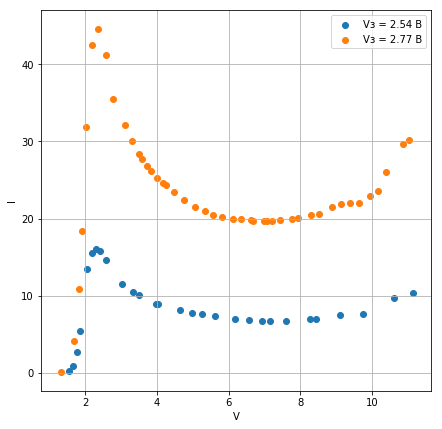

In [11]:
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import mlab
from scipy import interpolate
from math import* 
import warnings
warnings.filterwarnings('ignore')

# Парсинг данных.
data = pd.read_table('measurements', sep = '\s+' )
data2 = pd.read_table('measurements2', sep = '\s+' )
I = data['I(B)']
V = data['V(B)']
I2 = data2['I(B)']
V2 = data2['V(B)']




#Часть 1
'''
Расстояния между максимумами и между минимумами 
накал 2.77 В - 4.2 B расстояние
накал 2.54 В - 4.0 B расстояние
'''

#Часть 2

#Визуализация.
plt.figure(figsize= (7,7)) 
plt.scatter(V,I, label='Vз = 2.54 B')
plt.scatter(V2,I2, label='Vз = 2.77 B')
plt.xlabel("V")
plt.ylabel("I")
plt.grid()
plt.legend();

